In [4]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline



/Users/lauracollins/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
#Load the training data
col_names = ['deltaI', 'deltaR', 'avgPeak', 'avgWidth', 'avgProm']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

data = pd.read_csv('LineCutTrainingData051418.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,deltaI,deltaR,avgPeak,avgWidth,avgProm,peak1,peak2,peak3,peak4,peak5,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,0.81472,-0.147980,5.2376,0.017787,4.9919,8.8011,6.3141,5.0277,4.2308,3.7147,...,0.004366,0.008760,0.014187,0.020411,0.026567,8.5696,6.1381,4.8111,3.9784,3.4302
1,0.12699,-0.136070,2.6964,0.028479,2.0502,4.8072,3.3659,2.6933,2.3064,2.0581,...,0.006400,0.015034,0.024527,0.034571,0.044302,4.0741,3.0305,2.2895,1.8457,1.5491
2,0.63236,-1.417600,9.4789,0.010580,9.3400,17.1920,11.3730,9.0202,7.2687,6.3684,...,0.002534,0.005047,0.008062,0.012225,0.015909,17.0760,11.2750,8.8971,7.1230,6.2019
3,0.27850,-0.711760,10.2640,0.008488,10.1540,11.4840,13.2930,11.6750,9.5615,8.1874,...,0.003443,0.004523,0.006383,0.009193,0.012372,11.3760,13.2180,11.5810,9.4507,8.0602
4,0.95751,-0.055153,5.4478,0.017317,5.2103,9.5000,6.4023,5.1749,4.3685,3.8117,...,0.003987,0.008688,0.013858,0.019786,0.025924,9.2822,6.2320,4.9647,4.1231,3.5350


## Creating the training and testing sets

In [6]:
#Assigning the different columns to new dataframe names

#Target variables
Y1 = pd.DataFrame(data['deltaI']) #just delta I
Y2 = pd.DataFrame(data['deltaR']) # just delta R
Y3 = pd.DataFrame.join(Y1, Y2) # both deltas

#Indicator variables
X1 = data[col_names[2:]] #all variables
X2 = data[col_names[5:]] #not the average variables
X3 = data[col_names[2:5]] #just the average variables

#Splitting into train and test sets

#Random state
rs = 42
#Test size
ts1 = 0.3

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)


## Linear Regression models

#### Using linear regression from scikit-learn with all variables 


Coefficients: 
               deltaI      deltaR
avgPeak    -0.070195    0.397363
avgWidth  124.071622  129.584566
avgProm     0.024801   -0.432314
peak1      -0.871793    0.503299
peak2      -4.364336   35.148653
peak3      23.599074  -64.327024
peak4      -4.900366   -5.069427
peak5     -21.891172    7.777064
loc1       41.115400  -74.790760
loc2       -2.138044  -59.987918
loc3        7.067450   19.303539
loc4        1.222247    3.232055
loc5       -1.726299   -4.577951
width1   -177.742203  237.395460
width2    -85.591629  145.263462
width3    -26.747357  -75.134850
width4     46.388105  137.039658
width5     69.562889   83.656211
prom1       0.865802   -0.495665
prom2       4.367755  -35.138877
prom3     -23.603863   64.323537
prom4       4.903153    5.082092
prom5      21.892536   -7.766884
Mean squared error: 0.029
Variance score: 0.766
Score on test set: 0.786


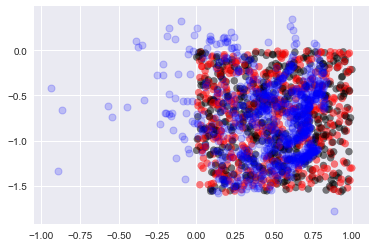

In [7]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_1_train, Y_3_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_1_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg1.coef_.T, index = X1.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred1))

print('Score on test set: %.3f' % reg1.score(X_1_test, Y_3_test))

# Plot outputs
plt.scatter(Y_3_test['deltaI'], Y_3_test['deltaR'],  color=['black','red'], alpha = 0.5)
plt.scatter(y_pred1[:,0], y_pred1[:,1], color='blue', linewidth=1, alpha = 0.2)

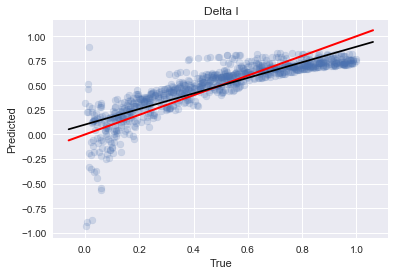

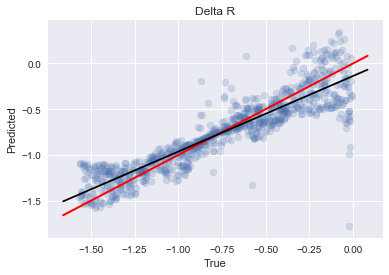

In [40]:
from pylab import *

figure()
plt.scatter(Y_3_test['deltaI'],y_pred1[:,0], alpha = 0.2)
axes().set_title('Delta I')
axes().set_xlabel('True')
axes().set_ylabel('Predicted')

xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

fit_I = np.polyfit(Y_3_test['deltaI'], y_pred1[:,0],1)
xp = np.linspace(xmin, xmax, 100)
p = np.poly1d(fit_I)
plt.plot(xp, p(xp), '-', color = 'black')

figure()
plt.scatter(Y_3_test['deltaR'],y_pred1[:,1], alpha = 0.2)

axes().set_title('Delta R')
axes().set_xlabel('True')
axes().set_ylabel('Predicted')

xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

fit_R = np.polyfit(Y_3_test['deltaR'], y_pred1[:,1],1)
xp = np.linspace(xmin, xmax, 100)
p = np.poly1d(fit_R)
plt.plot(xp, p(xp), '-', color = 'black')


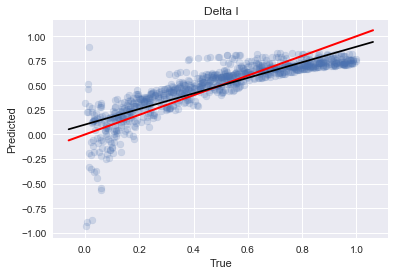

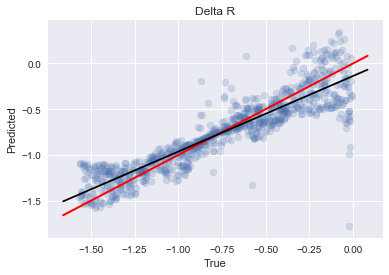

In [43]:
## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    axes().set_title(name)
    axes().set_xlabel('True')
    axes().set_ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    return

plotSummary(Y_3_test['deltaI'], y_pred1[:,0], 'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred1[:,1], 'Delta R')

#### Using linear regression from scikit-learn with non-average variables

Coefficients: 
             deltaI      deltaR
peak1    -0.741901    0.892310
peak2   -10.187392   50.635685
peak3    29.695740  -89.645666
peak4   -12.936964  -18.759167
peak5   -12.470571   30.787125
loc1     62.765582  -72.026334
loc2      1.805427  -65.635055
loc3      4.433252   26.651986
loc4      3.727135    0.194762
loc5     -3.170542   -4.828524
width1 -161.130862  246.958618
width2  -69.832641  186.506751
width3  -41.858887  -70.690421
width4   65.783503  199.864392
width5  102.061265   95.750462
prom1     0.727406   -0.889849
prom2    10.186138  -50.630958
prom3   -29.710006   89.640278
prom4    12.933811   18.768291
prom5    12.468669  -30.782600
Mean squared error: 0.039
Variance score: 0.685
Score on test set: 0.719


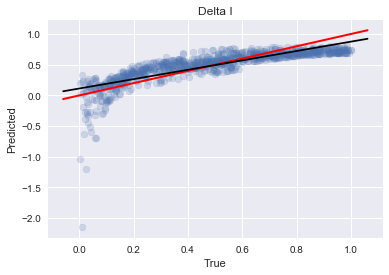

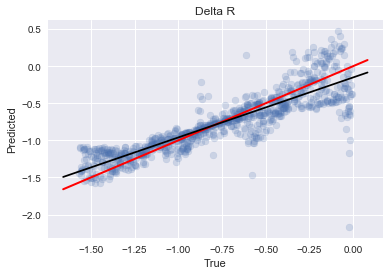

In [44]:
#Initialize and fit model to training data
reg2 = linear_model.LinearRegression()
reg2.fit(X_2_train, Y_3_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_2_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg2.coef_.T, index = X2.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred2))

print('Score on test set: %.3f' % reg2.score(X_2_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred2[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred2[:,1], 'Delta R')

In [8]:
y_pred2 = reg2.predict(X_2_test)
print(r2_score(Y_3_test, y_pred2))
print(reg2.score(X_2_test, Y_3_test))

#It is odd that these numbers are different. -- I'm pretty sure they should be the same. 


0.685343428305
0.718808415994


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

#### Using linear regression from scikit-learn with only average variables

Coefficients: 
              deltaI     deltaR
avgPeak   -0.559148   0.623904
avgWidth -14.967260  40.019931
avgProm    0.497997  -0.631714
Mean squared error: 0.067
Variance score: 0.502
Score on test set: 0.512


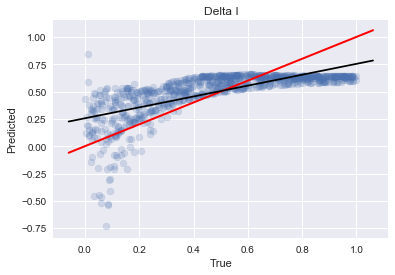

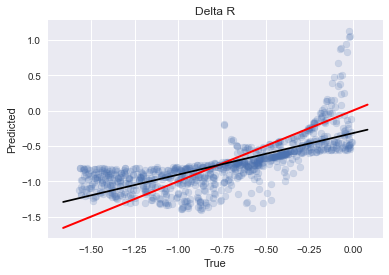

In [45]:
#Initialize and fit model to training data
reg3 = linear_model.LinearRegression()
reg3.fit(X_3_train, Y_3_train)

#Make predictions using the testing set
y_pred3 = reg3.predict(X_3_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg3.coef_.T, index = X3.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred3))

print('Score on test set: %.3f' % reg3.score(X_3_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred3[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred3[:,1], 'Delta R')

#### Using statsmodels on (X1, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1274.
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        16:55:52   Log-Likelihood:                 1015.2
No. Observations:                2100   AIC:                            -1984.
Df Residuals:                    2077   BIC:                            -1854.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.1265      0.024     -5.208      0.0

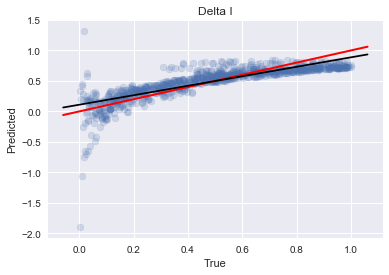

In [50]:
#Initialize and fit OLS model for deltaI 
model1 = sm.OLS(Y_1_train, X_1_train)
results1 = model1.fit()

#Make predictions on testing data
predictions1 = results1.predict(X_1_test) # make the predictions by the model

print(results1.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_1_test['deltaI'], predictions1,'Delta I')


#### Using statsmodels on (X1, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1598.
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        15:36:52   Log-Likelihood:                 313.80
No. Observations:                2100   AIC:                            -581.6
Df Residuals:                    2077   BIC:                            -451.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5382      0.034     15.862      0.0

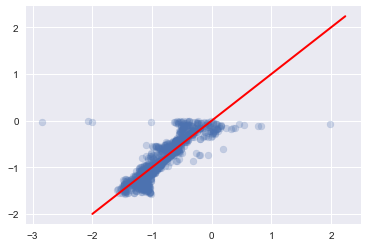

In [34]:
#Initialize and fit OLS model for deltaR 
model1a = sm.OLS(Y_2_train, X_1_train)
results1a = model1a.fit()

#Make predictions on testing data
predictions1a = results1a.predict(X_1_test) # make the predictions by the model

print(results1a.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plt.scatter(predictions1a,Y_2_test, alpha = 0.25)

xmin, xmax = plt.xlim()
xmin = -2


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Using statsmodels on (X2, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1110.
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        15:36:57   Log-Likelihood:                 744.93
No. Observations:                2100   AIC:                            -1450.
Df Residuals:                    2080   BIC:                            -1337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1         -1.5869      0.140    -11.328      0.0

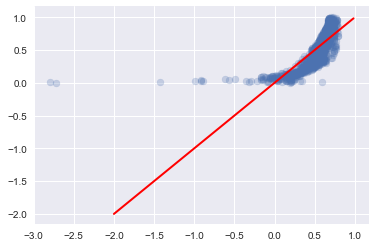

In [35]:
#Initialize and fit OLS model for deltaI 
model2 = sm.OLS(Y_1_train, X_2_train)
results2 = model2.fit()

#Make predictions on testing data
predictions2 = results2.predict(X_2_test) # make the predictions by the model

print(results2.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plt.scatter(predictions2,Y_1_test, alpha = 0.25)

xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one


#### Using statsmodels with (X2,Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1612.
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        15:37:52   Log-Likelihood:                 182.14
No. Observations:                2100   AIC:                            -324.3
Df Residuals:                    2080   BIC:                            -211.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1          2.2805      0.183     12.452      0.0

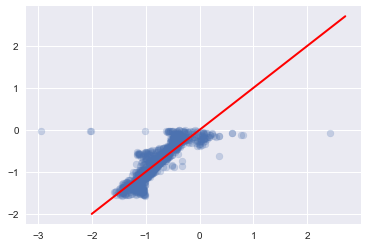

In [36]:
#Initialize and fit OLS model for deltaR 
model2a = sm.OLS(Y_2_train, X_2_train)
results2a = model2a.fit()

#Make predictions on testing data
predictions2a = results2a.predict(X_2_test) # make the predictions by the model

print(results2a.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plt.scatter(predictions2a,Y_2_test, alpha = 0.25)

xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Using statsmodels on (X3, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2377.
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        15:41:26   Log-Likelihood:                -279.66
No. Observations:                2100   AIC:                             565.3
Df Residuals:                    2097   BIC:                             582.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.5114      0.031    -16.285      0.0

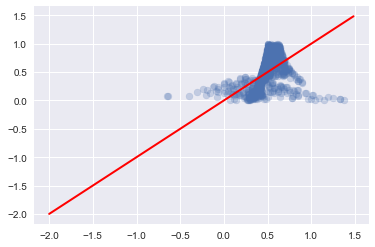

In [37]:
#Initialize and fit OLS model for deltaI 
model3 = sm.OLS(Y_1_train, X_3_train)
results3 = model3.fit()

#Make predictions on testing data
predictions3 = results3.predict(X_3_test) # make the predictions by the model

print(results3.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plt.scatter(predictions3,Y_1_test, alpha = 0.25)

xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Using statsmodels on (X3, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     3848.
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        15:42:37   Log-Likelihood:                -794.85
No. Observations:                2100   AIC:                             1596.
Df Residuals:                    2097   BIC:                             1613.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5761      0.040     14.355      0.0

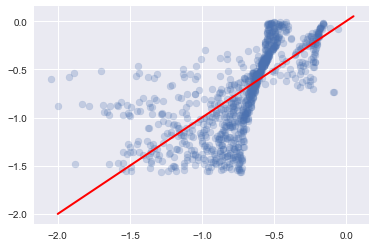

In [39]:
#Initialize and fit OLS model for deltaR 
model3a = sm.OLS(Y_2_train, X_3_train)
results3a = model3a.fit()

#Make predictions on testing data
predictions3a = results3a.predict(X_3_test) # make the predictions by the model

print(results3a.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plt.scatter(predictions3a,Y_2_test, alpha = 0.25)

xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Statsmodels GLM (generalized linear models) with (X1, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -1984.3579 
Link Function:      identity         BIC:            -15841.6539
Dependent Variable: deltaI           Log-Likelihood: 1015.2     
Date:               2018-05-15 16:10 LL-Null:        -385.78    
No. Observations:   2100             Deviance:       46.758     
Df Model:           22               Pearson chi2:   46.8       
Df Residuals:       2077             Scale:          0.022512   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
avgPeak     -0.1265   0.0243  -5.2080 0.0000   -0.1741   -0.0789
avgWidth   141.4722   7.3449  19.2613 0.0000  127.0765  155.8679
avgProm      0.0772   0.0244   3.1680 0.0015    0.0294    0.1249
peak1       -1.3577   0.1260 -10.7773 0.0

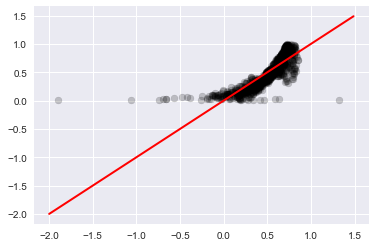

In [41]:
#Initialize and fit GLM model for deltaI 
model4 = sm.GLM(Y_1_train,X_1_train)
results4 = model4.fit()

#Make predictions on testing data
predictions4 = results4.predict(X_1_test)

print(results4.summary2())

#Plot results
plt.scatter(predictions4,Y_1_test, color = 'black', alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Statsmodels GLM with (X1, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -581.6024  
Link Function:      identity         BIC:            -15797.2205
Dependent Variable: deltaR           Log-Likelihood: 313.80     
Date:               2018-05-15 16:12 LL-Null:        -1304.3    
No. Observations:   2100             Deviance:       91.191     
Df Model:           22               Pearson chi2:   91.2       
Df Residuals:       2077             Scale:          0.043905   
Method:             IRLS                                        
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
avgPeak        0.5382   0.0339  15.8623 0.0000   0.4717   0.6047
avgWidth      86.0895  10.2573   8.3930 0.0000  65.9855 106.1935
avgProm       -0.5632   0.0340 -16.5575 0.0000  -0.6299  -0.4965
peak1          1.7178   0.1759   9.7643 0

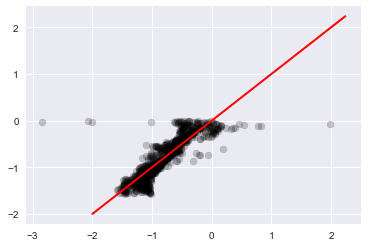

In [45]:
#Initialize and fit GLM model for deltaR
model4a = sm.GLM(Y_2_train,X_1_train)
results4a = model4a.fit()

#Make predictions on testing data
predictions4a = results4a.predict(X_1_test)

print(results4a.summary2())

#Plot results
plt.scatter(predictions4a,Y_2_test, color = 'black', alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Statsmodels GLM with (X2, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -1449.8569 
Link Function:      identity         BIC:            -15850.8778
Dependent Variable: deltaI           Log-Likelihood: 744.93     
Date:               2018-05-15 16:12 LL-Null:        -385.78    
No. Observations:   2100             Deviance:       60.483     
Df Model:           19               Pearson chi2:   60.5       
Df Residuals:       2080             Scale:          0.029078   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
peak1       -1.5869   0.1401 -11.3280 0.0000   -1.8615   -1.3123
peak2       -9.3792   3.4323  -2.7327 0.0063  -16.1064   -2.6521
peak3       30.8240   6.8004   4.5327 0.0000   17.4955   44.1526
peak4       -8.1777   6.7804  -1.2061 0.2

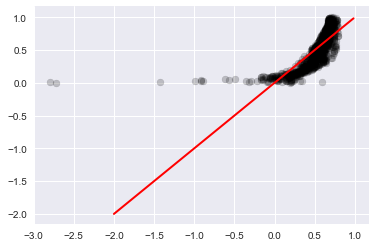

In [47]:
#Initialize and fit GLM model for deltaI
model5 = sm.GLM(Y_1_train,X_2_train)
results5 = model5.fit()

#Make predictions on testing data
predictions5 = results5.predict(X_2_test)

print(results5.summary2())

#Plot results
plt.scatter(predictions5,Y_1_test, color = 'black', alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



#### Statsmodels GLM with (X2, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -324.2885  
Link Function:      identity         BIC:            -15807.9876
Dependent Variable: deltaR           Log-Likelihood: 182.14     
Date:               2018-05-15 16:13 LL-Null:        -1304.3    
No. Observations:   2100             Deviance:       103.37     
Df Model:           19               Pearson chi2:   103.       
Df Residuals:       2080             Scale:          0.049699   
Method:             IRLS                                        
-----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|     [0.025    0.975] 
-----------------------------------------------------------------
peak1     2.2805    0.1831   12.4521  0.0000     1.9216    2.6395
peak2    49.3080    4.4871   10.9887  0.0000    40.5134   58.1027
peak3   -91.4993    8.8904  -10.2919  0.0000  -108.9242  -74.0743
peak4   -26.5778    8.8643   -2.998

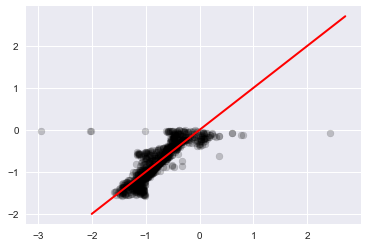

In [48]:
#Initialize and fit GLM model for deltaR
model5a = sm.GLM(Y_2_train,X_2_train)
results5a = model5a.fit()

#Make predictions on testing data
predictions5a = results5a.predict(X_2_test)

print(results5a.summary2())

#Plot results
plt.scatter(predictions5a,Y_2_test, color = 'black', alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2

plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



## Decision Tree Models
#### Using Decision Trees in scikit-learn to predict deltaI and deltaR simultaneously

#### Using (X1, Y3)

Regression 1 Feature Importance: [  1.76727040e-03   9.57493556e-02   4.76127229e-01   1.40178123e-02
   4.73534169e-04   2.67940713e-04   1.74033701e-03   5.35385696e-02
   4.69911997e-03   4.03322831e-03   3.56162407e-03   9.21163408e-03
   2.71804863e-01   1.02089715e-02   1.00679524e-02   2.54406146e-03
   3.74046259e-03   1.99035858e-02   9.99887879e-03   8.89051175e-04
   2.27650459e-04   5.02458424e-03   4.02283669e-04]
Regression 2 Feature Importance: [  1.50636974e-03   9.66554909e-02   4.76110897e-01   1.55806629e-02
   1.62523046e-03   3.71278338e-04   1.57370142e-02   4.33583371e-02
   4.61716270e-03   4.21485471e-03   3.56171531e-03   9.31842894e-03
   2.71746283e-01   9.30936433e-03   9.37794768e-03   1.00147037e-03
   3.63357210e-03   1.43135892e-02   9.33976360e-03   4.72579516e-04
   2.01852550e-03   1.10855272e-03   5.02090923e-03]
Regression 3 Feature Importance: [  9.24000523e-04   1.00487258e-01   4.76525914e-01   1.46859421e-02
   6.79269714e-04   9.88787753e-04  

array([ 0.99582722,  0.99612122,  0.99563589,  0.9925137 ,  0.99364058,
        0.99343833,  0.99585159,  0.99423188,  0.99343314,  0.99572592])

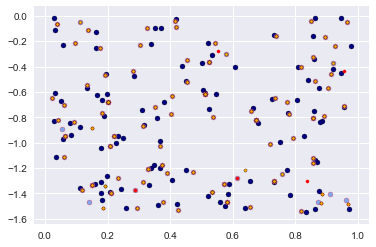

In [49]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

#Initialize the models with various max depths
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3 = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1.fit(X_1_train, Y_3_train)
regr_2.fit(X_1_train, Y_3_train)
regr_3.fit(X_1_train, Y_3_train)


#Print the coefficients or importances
print(pd.DataFrame([regr_1.feature_importances_; regr_2.feature_importances_; regr_3.feature_importances_]))




print('Regression 1 Feature Importance:', regr_1.feature_importances_)
print('Regression 2 Feature Importance:', regr_2.feature_importances_)
print('Regression 3 Feature Importance:', regr_3.feature_importances_)

#Use model to predict
y_1 = regr_1.predict(X_1_test)
y_2 = regr_2.predict(X_1_test)
y_3 = regr_3.predict(X_1_test)

#Plot results
s = 25
plt.scatter(Y_3_test.iloc[1:100, 0], Y_3_test.iloc[1:100, 1], c="navy", s=s,edgecolor="black", label="data")

#plt.show()
plt.scatter(y_1[1:100, 0], y_1[1:100, 1], c="cornflowerblue", s=s,edgecolor="red", label="data", alpha = 0.8)
plt.scatter(y_2[1:100, 0], y_2[1:100, 1], c="red", s=10,edgecolor="red", label="data")
plt.scatter(y_3[1:100, 0], y_3[1:100, 1], c="orange", s=10,edgecolor="black", label="data")

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1.score(X_1_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2.score(X_1_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3.score(X_1_test,Y_3_test),', using max depth of 30')

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)

In [57]:
pd.DataFrame([regr_1.feature_importances_, regr_2.feature_importances_, regr_3.feature_importances_]).T



,0,1,2
0,0.001767,0.001506,0.000924
1,0.095749,0.096655,0.100487
2,0.476127,0.476111,0.476526
3,0.014018,0.015581,0.014686
4,0.000474,0.001625,0.000679
5,0.000268,0.000371,0.000989
6,0.001740,0.015737,0.011610
7,0.053539,0.043358,0.000491
8,0.004699,0.004617,0.004699
9,0.004033,0.004215,0.004031
